**Name:** Luan Minh Tran

**NetID:** lmt185

**RUID:** 197002611

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [ ]:
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cguitar.tif to cguitar.tif
User uploaded file "cguitar.tif" with length 105324 bytes


In [ ]:
img = np.asarray(Image.open('cguitar.tif'))
img

array([[254, 253, 253, ..., 151, 150, 150],
       [254, 253, 252, ..., 151, 150, 149],
       [253, 253, 252, ..., 150, 150, 149],
       ...,
       [124, 124, 123, ...,  21,  21,  20],
       [124, 123, 123, ...,  21,  20,  20],
       [124, 123, 123, ...,  21,  20,  20]], dtype=uint8)

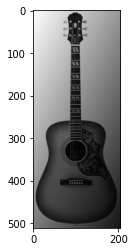

In [ ]:
# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
print(img[10][1]) # ec(x, y) x=1,y=10
print(img[100][10]) # ec(x, y) x=10,y=100
print(img[1][20]) # ec(x, y) x=20,y=1
print(img[200][30]) # ec(x, y) x=30,y=200

# print(img[20][1]) # ec(x, y) x=20,y=1
# print(img[100][20])
# print(img[200][10])
# print(img[240][40])

251
223
243
188


In [ ]:
# TODO: Compute least-squares estimate from selected corrupt pixels
A = np.array([[255, 2550, 5100, 7650],
              [2550, 25500, 255, 51000],
              [255, 255, 255, 255]]).T 
              
b = np.array([251, 223, 243, 188]).T 
A
# A2 = np.array([[255, 5100, 2550, 10200],
#               [5100, 25500, 51000, 61200],
#               [255, 255, 255, 255]]).T 
# b2 = np.array([248, 218, 198, 172]).T 
# A2

array([[  255,  2550,   255],
       [ 2550, 25500,   255],
       [ 5100,   255,   255],
       [ 7650, 51000,   255]])

In [ ]:
q = np.dot(np.dot(inv(np.dot(A.T, A)), A.T), b)
q
# q = np.dot(np.dot(inv(np.dot(A2.T, A2)), A2.T), b2)
# q

array([-2.03940043e-03, -9.86607897e-04,  9.95064523e-01])

In [ ]:
print('f(x,y) = {0:3.3f}x + {1:3.3f}y + {2:3.3f}'.format(q[0], q[1], q[2]))

f(x,y) = -0.002x + -0.001y + 0.995


In [ ]:
arr = []
for x in range(205):
    arr.append([])
    for y in range(511):
        arr[x].append(-0.002*x + -0.001*y + 0.995)
mat = np.array(arr).T

In [ ]:
# TODO: Undo the image corruption
result = np.divide(img, mat)
# result

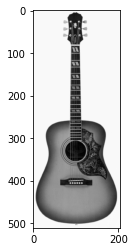

In [ ]:
# TODO: Display the uncorrupted image
plt.imshow(result, cmap='gray')
plt.show()